1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapezoid

FONTSIZE = 14

NumberOfPoints = 5000
std = 1
x = np.random.normal(0, std, NumberOfPoints)
bin = 50

counts, binEdges = np.histogram(x, bin)
binCenter = (binEdges[:-1] + binEdges[1:])/2
binWidths = binEdges[1:] - binEdges[:-1]


poissonError = 1/np.sqrt(counts)

def STDdef(x, std):
   return 1.06*std*len(x)**(-1./5)

def Gaussian(x, x_i, std):
   return 1/np.sqrt(2*np.pi*std**2) * np.exp(-0.5 *((x - x_i)/(std))**2)

#Kernel density estimator for one single value in x
def KDE(x_i, h, N):
   sum = 0
   xLin = np.linspace(x_i.min(), x_i.max(), len(x_i))

   for i in x_i:

      sum += Gaussian(xLin, i, h)
      #! IMPORTANT THE RETURN OF THE FUNCTION
   return xLin, 1/(N*h) * sum

xKDE, KDEfunction = KDE(x, binWidths[0], NumberOfPoints)


Gaus = []
for i in x:
   gaus = Gaussian(xKDE, i, STDdef(x, std))
   Gaus.append(gaus)

/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_30273/4205700597.py:18: RuntimeWarning: divide by zero encountered in divide
  poissonError = 1/np.sqrt(counts)


Text(0.5, 1.0, 'KDE distribution')

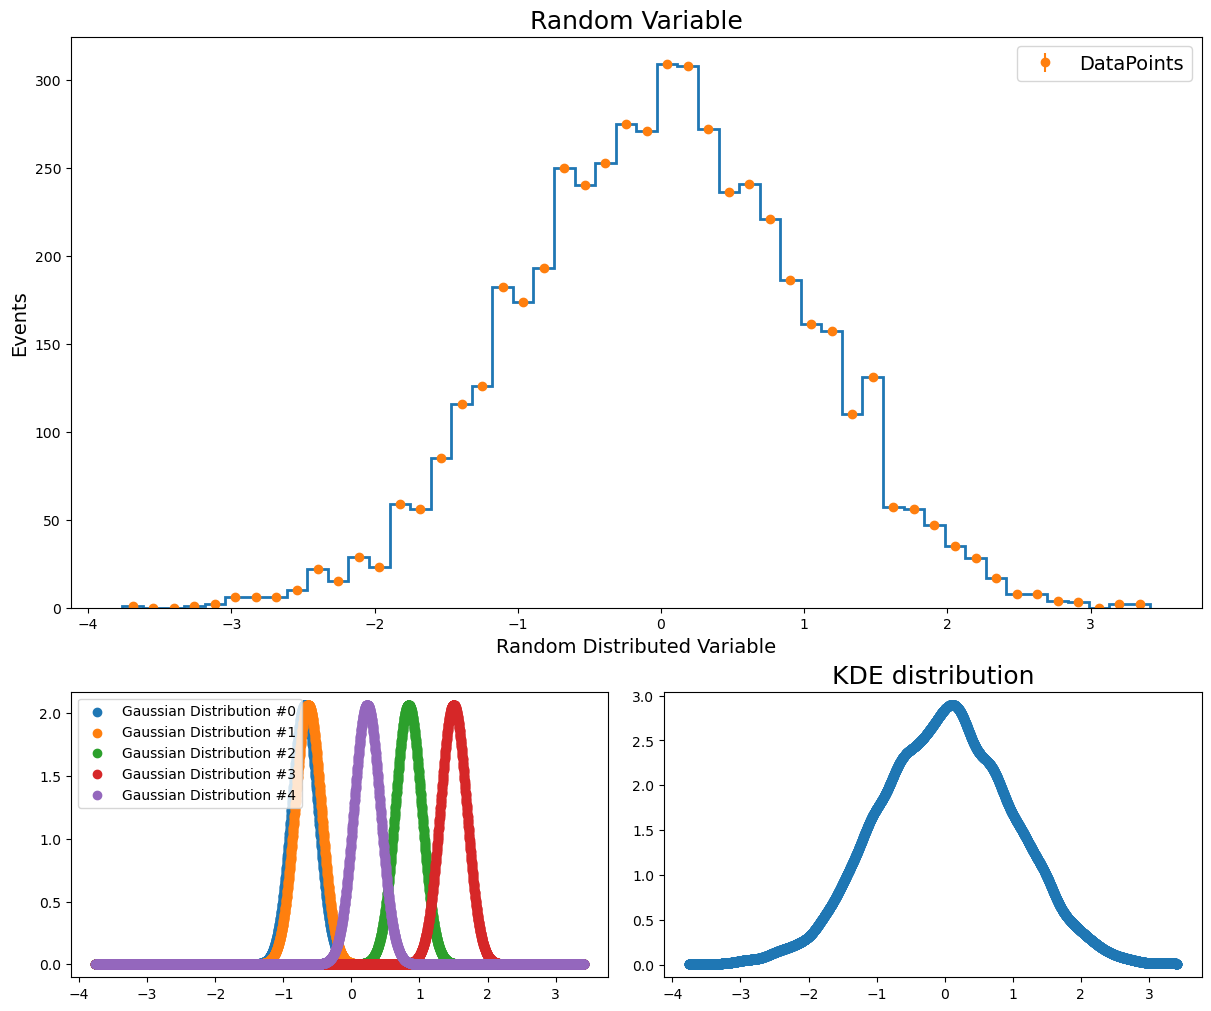

In [28]:
gridsize = (3, 2)

fig = plt.figure(figsize = (12, 10), constrained_layout = True)

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax1.hist(x, bins = bin, histtype = 'step', lw = 2)
ax1.errorbar(binCenter, counts, poissonError, fmt = 'o', label="DataPoints")
ax1.set_xlabel("Random Distributed Variable", fontsize = FONTSIZE)
ax1.set_ylabel("Events", fontsize = FONTSIZE)
ax1.set_title("Random Variable", fontsize = FONTSIZE + 4)
#ax1.set_yticks(np.arange(0, counts.max(), int(counts.max()/10)))
ax1.legend(fontsize = FONTSIZE)

ax2 = plt.subplot2grid(gridsize, (2, 0))
#ax2.scatter(xKDE, Gaus[0], color="orange")

for i, GaussArr in enumerate(Gaus[:5]):
   ax2.scatter(xKDE, GaussArr, label=f"Gaussian Distribution #{i}")

ax2.legend()



ax3 = plt.subplot2grid(gridsize, (2, 1))
ax3.scatter(xKDE, KDEfunction)
ax3.set_title("KDE distribution", fontsize = FONTSIZE + 4)

#ax3.set_title("KDE distribution", fontsize = FONTSIZE + 4)


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

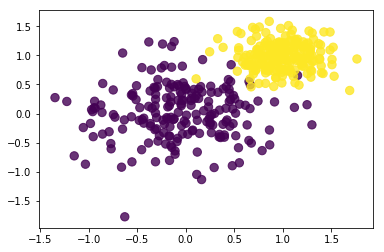

In [15]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

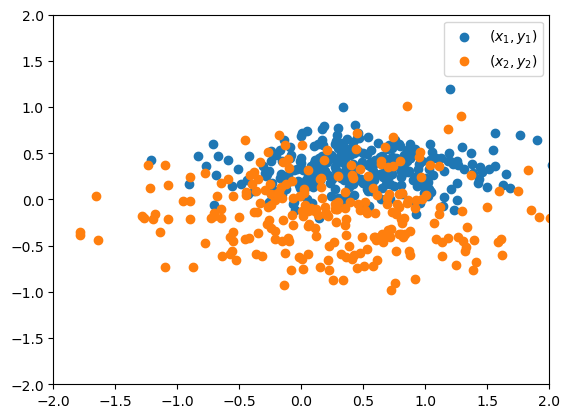

In [16]:
meanX1, meanX2, = np.random.uniform(-1, 1, 2)
meanY1, meanY2 = np.random.uniform(-1, 1, 2)

stdX1, stdX2 = np.random.uniform(0, 1, 2)
stdY1, stdY2 = np.random.uniform(0, 1, 2)

def Gaussian2D(meanX, stdX, meanY, stdY):
   Number = np.random.randint(100, 300)
   x = np.random.normal(meanX, stdX, Number)
   y = np.random.normal(meanY, stdY, Number)

   return (x, y)


x1, y1 = Gaussian2D(meanX1, stdX1, meanY1, stdY1)
x2, y2 = Gaussian2D(meanX2, stdX2, meanY2, stdY2)


plt.figure()
plt.scatter(x1, y1, label=r"$(x_1, y_1)$")
plt.scatter(x2, y2, label=r"$(x_2, y_2)$")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [17]:
#!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy


In [18]:
import pandas as pd
from scipy import stats
import seaborn as sns

df = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())

def Lin(x, a, b):
   return a + b*x

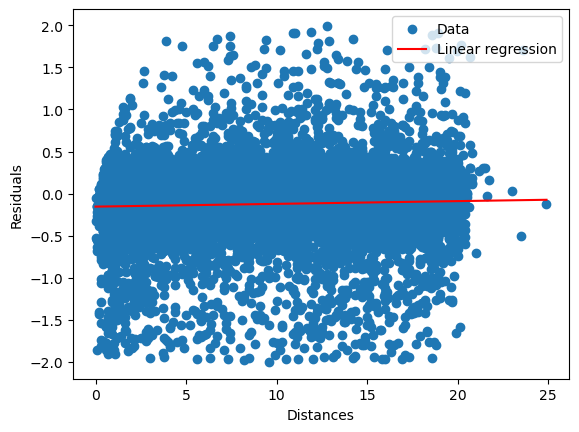

In [19]:
df = df[np.abs(df['residuals']) < 2]

linreg = stats.linregress(df['distances'], df['residuals'])
x = np.linspace(df['distances'].min(), df['distances'].max(), 100)

plt.scatter(df['distances'], df['residuals'], label="Data")
plt.plot(x, Lin(x, linreg[1], linreg[0]), color='red', label="Linear regression")
plt.xlabel("Distances")
plt.ylabel("Residuals")
plt.legend()

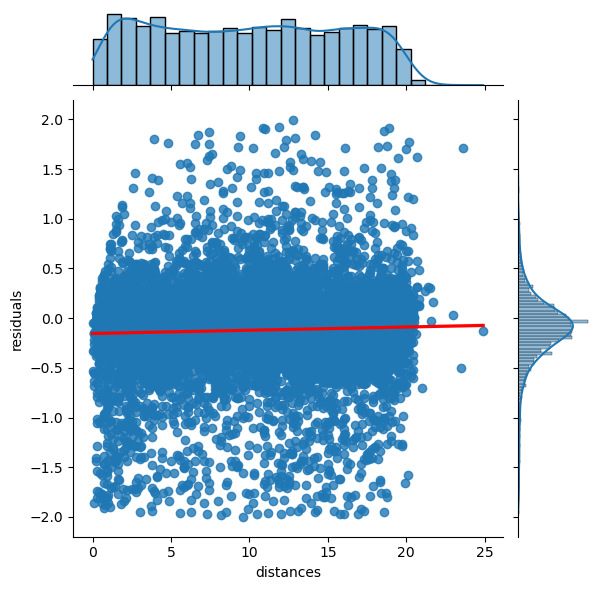

In [20]:
g = sns.jointplot(x = df['distances'], y = df['residuals'], kind='reg', line_kws={'color': 'red'})